In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models


In [15]:
# Load dataset
df = pd.read_csv("cleaned_heart_prediction_data451.csv")   # make sure target column is 'target'

X = df.drop('target', axis=1).values
y = df['target'].values

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ANN Model
model_ann = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_ann.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate
pred_ann = (model_ann.predict(X_test) > 0.5).astype(int)
print("ANN Accuracy:", accuracy_score(y_test, pred_ann))

Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 0.6424 - accuracy: 0.6696
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.8170
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8795
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.9196
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9241
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9554
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9643
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9598
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9688
Epoch 10/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.9732
Epoch 11/50
14/14 [

In [16]:
print("ANN Accuracy:", accuracy_score(y_test, pred_ann))

ANN Accuracy: 0.9824561403508771


In [17]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nPerformance Report for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

evaluate_model(y_test,pred_ann,"ANN")


Performance Report for ANN
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.99        34

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57

AUC-ROC Score: 0.9852941176470589


In [18]:
# CNN
df = pd.read_csv("cleaned_heart_prediction_data451.csv")
X = df.drop("target", axis=1).values
y = df["target"].values

# scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# reshape for 1D CNN (samples, timesteps, channels)
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1D CNN model
model_cnn = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_cnn.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate
pred_cnn = (model_cnn.predict(X_test) > 0.5).astype(int)
print("CNN Accuracy:", accuracy_score(y_test, pred_cnn))


Epoch 1/50
14/14 [==============================] - 1s 4ms/step - loss: 0.6298 - accuracy: 0.7277
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.8482
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.4048 - accuracy: 0.8616
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3461 - accuracy: 0.8616
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8750
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2853 - accuracy: 0.8884
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.2714 - accuracy: 0.8884
Epoch 8/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.8929
Epoch 9/50
14/14 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.8884
Epoch 10/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2538 - accuracy: 0.8795
Epoch 11/50
14/14 [

In [19]:
print("CNN Accuracy:", accuracy_score(y_test, pred_cnn))

CNN Accuracy: 0.9649122807017544


In [20]:
#RNN

df = pd.read_csv("cleaned_heart_prediction_data451.csv")
X = df.drop("target", axis=1).values
y = df["target"].values

# scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# reshape for LSTM (samples, timesteps, features_per_step)
# each feature considered a time-step
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# LSTM model
model_rnn = models.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate
pred_rnn = (model_rnn.predict(X_test) > 0.5).astype(int)
print("RNN (LSTM) Accuracy:", accuracy_score(y_test, pred_rnn))


Epoch 1/50
14/14 [==============================] - 4s 7ms/step - loss: 0.6767 - accuracy: 0.6473
Epoch 2/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6253 - accuracy: 0.6875
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.5056 - accuracy: 0.7723
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 0.4088 - accuracy: 0.8438
Epoch 5/50
14/14 [==============================] - 0s 7ms/step - loss: 0.3656 - accuracy: 0.8661
Epoch 6/50
14/14 [==============================] - 0s 14ms/step - loss: 0.3442 - accuracy: 0.8795
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.3284 - accuracy: 0.8839
Epoch 8/50
14/14 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.8973
Epoch 9/50
14/14 [==============================] - 0s 7ms/step - loss: 0.3159 - accuracy: 0.8884
Epoch 10/50
14/14 [==============================] - 0s 6ms/step - loss: 0.3085 - accuracy: 0.8884
Epoch 11/50
14/14 

In [21]:
print("RNN (LSTM) Accuracy:", accuracy_score(y_test, pred_rnn))

RNN (LSTM) Accuracy: 0.9298245614035088


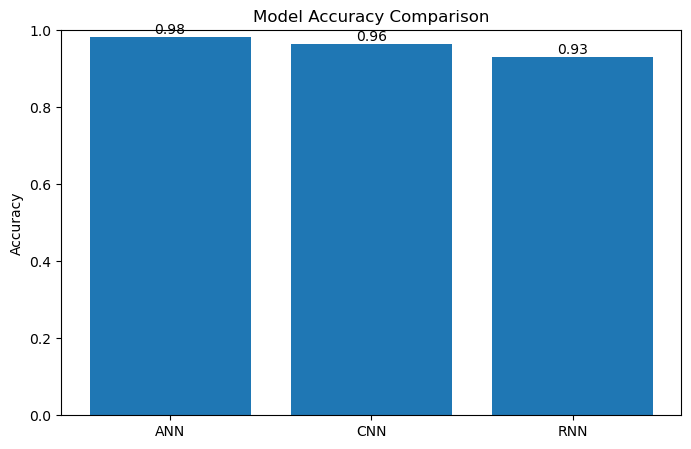

In [25]:
import matplotlib.pyplot as plt

# Example accuracies (replace with your actual results)
models = ["ANN", "CNN", "RNN"]
accuracies = [accuracy_score(y_test, pred_ann), accuracy_score(y_test, pred_cnn), accuracy_score(y_test, pred_rnn)]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies)

# Add accuracy labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height(), 
             f"{acc:.2f}", 
             ha='center', 
             va='bottom')

plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)

plt.savefig("DL_model_without_outliers.png")
plt.show()

In [23]:
evaluate_model(y_test,pred_ann,"ANN")
evaluate_model(y_test,pred_cnn,"CNN")
evaluate_model(y_test,pred_rnn,"RNN")


Performance Report for ANN
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.99        34

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57

AUC-ROC Score: 0.9852941176470589

Performance Report for CNN
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.97      0.97      0.97        34

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

AUC-ROC Score: 0.9635549872122763

Performance Report for RNN
Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  